In [ ]:
# Aparna Dileep (C0787339) 
# Aravind Murali Thricovil (C0819326) 
# Parvathy Rahul Menon (C0814633)
# Jaison Kayamkattil Jacob (C0814631)
# Prasanth Moothedath Padmakumar (C0796752)

# Dataset File downloaded from https://www.kaggle.com/c/nyc-taxi-trip-duration/overview
# Dataset Page New York City Taxi Trip Duration
# Data Fields: id - a unique identifier for each trip
# vendor_id - a code indicating the provider associated with the trip record
# pickup_datetime - date and time when the meter was engaged
# dropoff_datetime - date and time when the meter was disengaged
# passenger_count - the number of passengers in the vehicle (driver entered value)
# pickup_longitude - the longitude where the meter was engaged
# pickup_latitude - the latitude where the meter was engaged
# dropoff_longitude - the longitude where the meter was disengaged
# dropoff_latitude - the latitude where the meter was disengaged
# store_and_fwd_flag - This flag indicates whether the trip record was held in #
# vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - 
# Y=store and forward;
# N=not a store and forward trip
# trip_duration - duration of the trip in seconds

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pargan","key":"15f2c0b97ad49960d89c53e9014f7754"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15543  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9441  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4227  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3449  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
! kaggle competitions download -c nyc-taxi-trip-duration

 78% 49.0M/62.9M [00:00<00:00, 42.6MB/s]
100% 62.9M/62.9M [00:00<00:00, 85.8MB/s]
  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 146MB/s]
 25% 5.00M/20.3M [00:00<00:00, 22.6MB/s]
100% 20.3M/20.3M [00:00<00:00, 67.9MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip train.zip -d train

Archive:  train.zip
  inflating: train/train.csv         


In [ ]:
! mkdir test

mkdir: cannot create directory ‘test’: File exists


In [ ]:
! unzip test.zip -d test

Archive:  test.zip
replace test/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
! mkdir sample_submission

mkdir: cannot create directory ‘sample_submission’: File exists


In [ ]:
! unzip sample_submission.zip -d sample_submission

Archive:  sample_submission.zip
  inflating: sample_submission/sample_submission.csv  


In [ ]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head() #Displaying top 5 rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.tail() #bottom 5 rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
print("The shape of the dataset : Number oof rows = ",df.shape[0], "And Number of Columns = ",df.shape[1])

The shape of the dataset : Number oof rows =  1458644 And Number of Columns =  11


In [ ]:
#Dropping unwanted Features :
df.drop(['id'],axis=1,inplace = True)

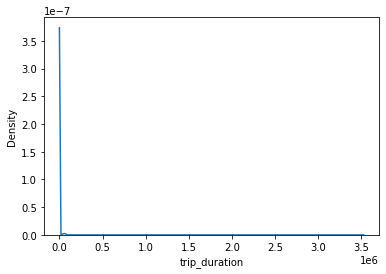

In [ ]:
sns.kdeplot(data=df, x="trip_duration")
plt.show()

In [ ]:
df.trip_duration.describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [ ]:
per = [0,10,20,30,40,50,60,70,80,90,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.trip_duration, i))

0 th percentile value =  1.0
10 th percentile value =  245.0
20 th percentile value =  348.0
30 th percentile value =  446.0
40 th percentile value =  548.0
50 th percentile value =  662.0
60 th percentile value =  798.0
70 th percentile value =  968.0
80 th percentile value =  1208.0
90 th percentile value =  1634.0
100 th percentile value =  3526282.0


In [ ]:
per = [0,1,2,3,4,5,6,7,8,9,10]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.trip_duration, i))

0 th percentile value =  1.0
1 th percentile value =  87.0
2 th percentile value =  122.0
3 th percentile value =  146.0
4 th percentile value =  165.0
5 th percentile value =  180.0
6 th percentile value =  195.0
7 th percentile value =  209.0
8 th percentile value =  221.0
9 th percentile value =  233.0
10 th percentile value =  245.0


In [ ]:
per = [90,91,92,93,94,95,96,97,98,99,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.trip_duration, i))

90 th percentile value =  1634.0
91 th percentile value =  1703.0
92 th percentile value =  1780.0
93 th percentile value =  1869.0
94 th percentile value =  1975.0
95 th percentile value =  2104.0
96 th percentile value =  2273.0
97 th percentile value =  2497.0
98 th percentile value =  2829.0
99 th percentile value =  3440.0
100 th percentile value =  3526282.0


In [ ]:
per = [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.trip_duration, i))

99.1 th percentile value =  3540.0
99.2 th percentile value =  3652.0
99.3 th percentile value =  3782.0
99.4 th percentile value =  3942.0
99.5 th percentile value =  4139.0
99.6 th percentile value =  4403.0
99.7 th percentile value =  4764.070999999996
99.8 th percentile value =  5551.71399999992
99.9 th percentile value =  85128.35700000008
100 th percentile value =  3526282.0


In [ ]:
df = df[df['trip_duration']<=5552]
df = df[df['trip_duration']>180]

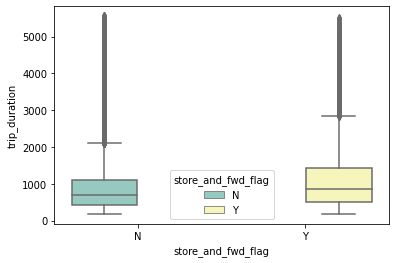

In [ ]:
sns.boxplot(x = 'store_and_fwd_flag',y="trip_duration", hue="store_and_fwd_flag",data=df, palette="Set3")
plt.show()

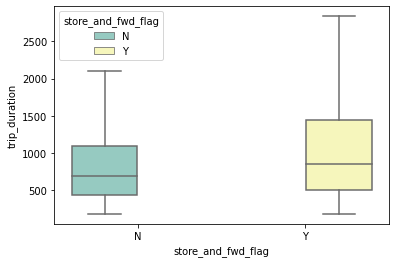

In [ ]:
sns.boxplot(x = 'store_and_fwd_flag',y="trip_duration", hue="store_and_fwd_flag",data=df, palette="Set3",showfliers = False)
plt.show()

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1375134
Y       7612
Name: store_and_fwd_flag, dtype: int64

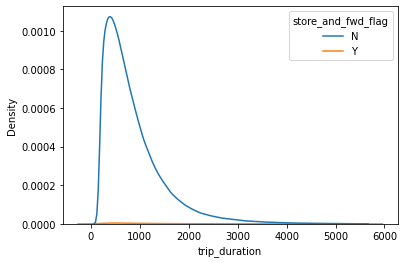

In [ ]:
sns.kdeplot(data=df, x="trip_duration", hue="store_and_fwd_flag")
plt.show()

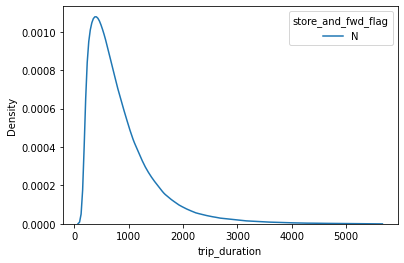

In [ ]:
sns.kdeplot(data=df[df['store_and_fwd_flag']=='N'], x="trip_duration", hue="store_and_fwd_flag")
plt.show()

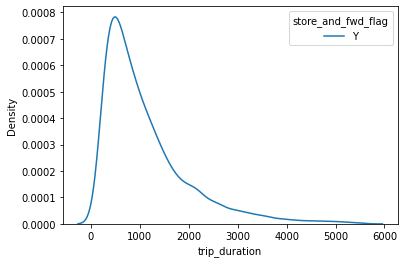

In [ ]:
sns.kdeplot(data=df[df['store_and_fwd_flag']=='Y'], x="trip_duration", hue="store_and_fwd_flag")
plt.show()

In [ ]:
df.vendor_id.value_counts()

2    739918
1    642828
Name: vendor_id, dtype: int64

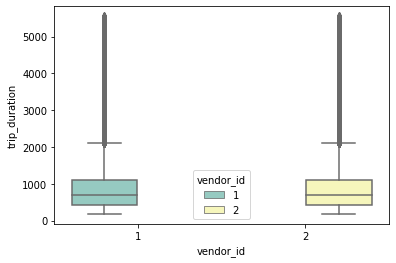

In [ ]:
sns.boxplot(x = 'vendor_id',y="trip_duration", hue="vendor_id",data=df, palette="Set3")
plt.show()

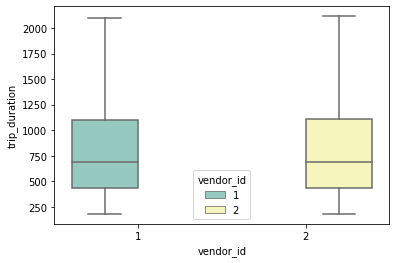

In [ ]:
sns.boxplot(x = 'vendor_id',y="trip_duration", hue="vendor_id",data=df, palette="Set3",showfliers=False)
plt.show()

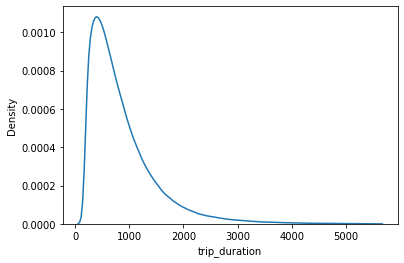

In [ ]:
sns.kdeplot(data=df[df['vendor_id']==1], x="trip_duration")
plt.show()

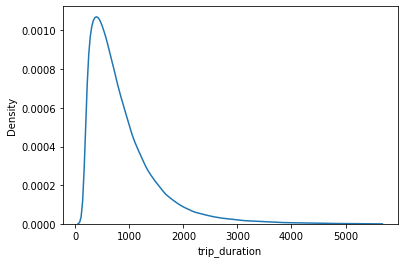

In [ ]:
sns.kdeplot(data=df[df['vendor_id']==2], x="trip_duration")
plt.show()

In [ ]:
df.passenger_count.value_counts()

1    977385
2    200911
5     74118
3     57274
6     45851
4     27194
0        12
9         1
Name: passenger_count, dtype: int64

In [ ]:
df = df[df['passenger_count']!=0]
df = df[df['passenger_count']!=9]

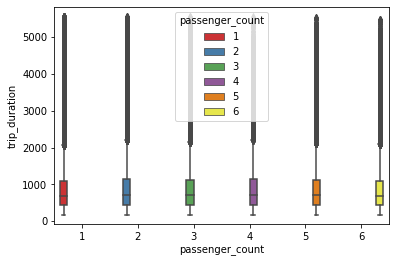

In [ ]:
sns.boxplot(x = 'passenger_count',y="trip_duration", hue="passenger_count",data=df, palette="Set1")
plt.show()

In [ ]:
locations = df[['pickup_longitude', 'pickup_latitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[-73.96927642822266, 40.79777908325195]

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
from math import sin, cos, sqrt, atan2, radians
def get_distance(lat1, lon1, lat2, lon2) :
  # approximate radius of earth in km
  R = 6373.0
  
  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  distance = R*c

  return distance

In [ ]:
distance = []
for i in range(len(df)):
  dummy = df.loc[i]
  dis = get_distance(dummy['pickup_latitude'],dummy['pickup_longitude'], dummy['dropoff_latitude'], dummy['dropoff_longitude'])

  distance.append(dis)

In [ ]:
#Create a new feature called distance
df['distance'] = distance
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [ ]:
df['distance'].describe()

count    1.382733e+06
mean     3.579359e+00
std      4.330515e+00
min      0.000000e+00
25%      1.336478e+00
50%      2.204411e+00
75%      4.034852e+00
max      1.241298e+03
Name: distance, dtype: float64

In [ ]:
per = [0,10,20,30,40,50,60,70,80,90,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

0 th percentile value =  0.0
10 th percentile value =  0.8977949920748793
20 th percentile value =  1.193118736890715
30 th percentile value =  1.4847242468613069
40 th percentile value =  1.8123427012106075
50 th percentile value =  2.20441104010099
60 th percentile value =  2.7186513647558903
70 th percentile value =  3.480575103756334
80 th percentile value =  4.79637805795684
90 th percentile value =  7.905038233218251
100 th percentile value =  1241.2982257566919


In [ ]:
per = [0,1,2,3,4,5,6,7,8,9,10]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

0 th percentile value =  0.0
1 th percentile value =  0.384723292210271
2 th percentile value =  0.5272759039929669
3 th percentile value =  0.6055773121140444
4 th percentile value =  0.6642840592011339
5 th percentile value =  0.7136268702487112
6 th percentile value =  0.75656181593394
7 th percentile value =  0.7957765403563013
8 th percentile value =  0.8318816376936742
9 th percentile value =  0.8656255472003116
10 th percentile value =  0.8977949920748793


In [ ]:
print("Rows with distance = 0 ", df[df['distance']==0].shape[0])

Rows with distance = 0  3748


In [ ]:
per = [90,91,92,93,94,95,96,97,98,99,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

90 th percentile value =  7.905038233218251
91 th percentile value =  8.529506379694038
92 th percentile value =  9.09860730441969
93 th percentile value =  9.639185697300679
94 th percentile value =  10.279768604986554
95 th percentile value =  11.29555821569695
96 th percentile value =  13.17794551007139
97 th percentile value =  15.812492140851411
98 th percentile value =  19.52199877709122
99 th percentile value =  20.834689979546543
100 th percentile value =  1241.2982257566919


In [ ]:
per = [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

99.1 th percentile value =  20.961022056536656
99.2 th percentile value =  21.088580932692842
99.3 th percentile value =  21.22600467617604
99.4 th percentile value =  21.399449703234133
99.5 th percentile value =  21.596523304413346
99.6 th percentile value =  21.881677874003778
99.7 th percentile value =  22.316500083781175
99.8 th percentile value =  22.93759699340491
99.9 th percentile value =  24.877227956030197
100 th percentile value =  1241.2982257566919


In [ ]:
per = [99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

99.91 th percentile value =  25.378371288988248
99.92 th percentile value =  25.957905024032726
99.93 th percentile value =  26.515328131931774
99.94 th percentile value =  27.24271752569762
99.95 th percentile value =  28.201407309960025
99.96 th percentile value =  29.771090343995528
99.97 th percentile value =  32.11619726237926
99.98 th percentile value =  34.88235104087297
99.99 th percentile value =  42.004225920998906
100 th percentile value =  1241.2982257566919


In [ ]:
per = [99.991,99.992,99.993,99.994,99.995,99.996,99.997,99.998,99.999,100]
for i in per:
  print(i,"th percentile value = ", np.percentile(df.distance, i))

99.991 th percentile value =  42.861253509761255
99.992 th percentile value =  44.081257039080114
99.993 th percentile value =  45.582190676415074
99.994 th percentile value =  47.60279976784046
99.995 th percentile value =  50.200933764147806
99.996 th percentile value =  53.74777400220483
99.997 th percentile value =  62.044721871948916
99.998 th percentile value =  68.18674767065446
99.999 th percentile value =  98.33370755002265
100 th percentile value =  1241.2982257566919


In [ ]:
#Distance>100km and distance !=100 we will remove
df = df[df['distance']<100]
df = df[df['distance']>0] 

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
#removing lattitude and longitude
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455,1.498991
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663,1.806074
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124,6.387103
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429,1.485965
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435,1.188962


In [ ]:
#Creating pickup features from date
df['pickup_month'] = df['pickup_datetime'].apply(lambda x : x.split()[0].split()[0].split('-')[1])
df['pickup_day'] = df['pickup_datetime'].apply(lambda x : x.split()[0].split()[0].split('-')[2])

In [ ]:
#Creating pickup features from time
df['pickup_hour'] = df['pickup_datetime'].apply(lambda x : x.split()[1].split(':')[0])
df['pickup_minute'] = df['pickup_datetime'].apply(lambda x : x.split()[1].split(':')[1])
df['pickup_second'] = df['pickup_datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [ ]:
#Creating dropoff features from date
df['dropoff_month'] = df['dropoff_datetime'].apply(lambda x : x.split()[0].split()[0].split('-')[1])
df['dropoff_day'] = df['dropoff_datetime'].apply(lambda x : x.split()[0].split()[0].split('-')[2])

In [ ]:
#Creating dropoff features from time
df['dropoff_hour'] = df['dropoff_datetime'].apply(lambda x : x.split()[1].split(':')[0])
df['dropoff_minute'] = df['dropoff_datetime'].apply(lambda x : x.split()[1].split(':')[1])
df['dropoff_second'] = df['dropoff_datetime'].apply(lambda x : x.split()[1].split(':')[2])

In [ ]:
df.drop(['pickup_datetime','dropoff_datetime'],axis=1,inplace = True)

In [ ]:
df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,N,455,1.498991,03,14,17,24,55,03,14,17,32,30
1,1,1,N,663,1.806074,06,12,00,43,35,06,12,00,54,38
2,2,1,N,2124,6.387103,01,19,11,35,24,01,19,12,10,48
3,2,1,N,429,1.485965,04,06,19,32,31,04,06,19,39,40
4,2,1,N,435,1.188962,03,26,13,30,55,03,26,13,38,10


In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1371381
Y       7590
Name: store_and_fwd_flag, dtype: int64

In [ ]:
def encode_sa_flag(x):
  if(x == 'N'):
    return 0
  else:
    return 1

df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: encode_sa_flag(x))

In [ ]:
#Checking for any null values
df.isnull().values.any()

False

In [ ]:
df.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,0,455,1.498991,03,14,17,24,55,03,14,17,32,30
1,1,1,0,663,1.806074,06,12,00,43,35,06,12,00,54,38
2,2,1,0,2124,6.387103,01,19,11,35,24,01,19,12,10,48
3,2,1,0,429,1.485965,04,06,19,32,31,04,06,19,39,40
4,2,1,0,435,1.188962,03,26,13,30,55,03,26,13,38,10


In [ ]:
y = df['trip_duration']
df.drop(['trip_duration'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=42)

In [ ]:
print('Size of Train data = ',X_train.shape[0])
print('Size of Test data = ',X_test.shape[0])

Size of Train data =  965279
Size of Test data =  413692


In [ ]:
  #Ref : https://www.kaggle.com/carlolepelaars/understanding-the-metric-rmsle

  from sklearn.metrics import mean_squared_log_error

  def RMSLE(y_true:np.ndarray, y_pred:np.ndarray) -> np.float64:
      """
          The Root Mean Squared Log Error (RMSLE) metric 
          
          :param y_true: The ground truth labels given in the dataset
          :param y_pred: Our predictions
          :return: The RMSLE score
      """
      return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

params = {'penalty':('l1', 'l2'), 'alpha':[0.00001, 0.0001, 0.001, 0.0000001, 0.01, 0.1, 1],
          'max_iter':[1000,2000,3000,1500,500,100]}

sgd_linear = SGDRegressor(loss='squared_loss') #ordinary least squares fit

clf = GridSearchCV(sgd_linear, param_grid=params,verbose=10,n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 12

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 1e-07, 0.01, 0.1, 1],
                         'max_iter': [1000, 2000, 3000, 1500, 500, 100],
                         'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs

In [ ]:
clf.best_params_

{'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l1'}

In [ ]:
penalty = 'l1' #standard regularizer for linear models. 
alpha = 0.0001 
#constant that multiplies the regularization team
max_iter = 100
#max number of passes over the training data 

sgd_linear = SGDRegressor(penalty = 'l1', alpha = 0.0001, max_iter = 100, loss='squared_loss')
sgd_linear.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
predictions = sgd_linear.predict(X_test)

In [ ]:
#Error for the predictions from model
RMSLE(y_test,predictions)

0.44532494299023356

In [ ]:
y_train[0:10].values

array([1438,  410,  324,  531,  219,  324, 1301, 1207,  887,  743])

In [ ]:
predictions[0:10]

array([ 548.59556284,  756.87275426,  600.3821399 , 1353.62739344,
       1647.84101839, 1229.60185824,  600.3893454 , 1259.47086532,
        904.14274926,  736.51005842])

In [ ]:
df.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,0,1.498991,03,14,17,24,55,03,14,17,32,30
1,1,1,0,1.806074,06,12,00,43,35,06,12,00,54,38
2,2,1,0,6.387103,01,19,11,35,24,01,19,12,10,48
3,2,1,0,1.485965,04,06,19,32,31,04,06,19,39,40
4,2,1,0,1.188962,03,26,13,30,55,03,26,13,38,10


In [ ]:
difference = y_test-predictions
print(difference)

1275832     -20.595563
105702     -103.872754
993657     -249.382140
507796      143.372607
508322      -86.841018
              ...     
438790      139.367587
581829      -18.939677
1116440     436.347477
526926    -1004.014708
852976      -59.344318
Name: trip_duration, Length: 413692, dtype: float64


In [ ]:
difftable = pd.DataFrame({'Actual_Value': y_test, 'Predicted_Value': predictions, 'Difference': difference})
difftable.head()

,Actual_Value,Predicted_Value,Difference
1275832,528,548.595563,-20.595563
105702,653,756.872754,-103.872754
993657,351,600.382140,-249.382140
507796,1497,1353.627393,143.372607
508322,1561,1647.841018,-86.841018


In [ ]:
difftable.tail()

,Actual_Value,Predicted_Value,Difference
438790,1003,863.632413,139.367587
581829,685,703.939677,-18.939677
1116440,987,550.652523,436.347477
526926,1652,2656.014708,-1004.014708
852976,707,766.344318,-59.344318
